# Enhancement

### Prediction with LSTM

In [5]:
# pip install keras
# pip install tensorflow

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import yfinance as yf

In [91]:
# here performing minute level prediction with lag = 1
# try other interval & lag later

df = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
df.reset_index(inplace=True,drop=False)
print(data)
df.head()

[*********************100%***********************]  1 of 1 completed
      level_0  index                  Datetime        Open        High  \
0           0      0 2020-11-18 09:30:00-05:00  360.910004  361.010010   
1           1      1 2020-11-18 09:31:00-05:00  360.739990  360.760010   
2           2      2 2020-11-18 09:32:00-05:00  360.679993  360.820007   
3           3      3 2020-11-18 09:33:00-05:00  360.720001  360.730011   
4           4      4 2020-11-18 09:34:00-05:00  360.660004  360.760010   
...       ...    ...                       ...         ...         ...   
1944     1944   1944 2020-11-24 15:55:00-05:00  363.260010  363.399994   
1945     1945   1945 2020-11-24 15:56:00-05:00  363.364990  363.369995   
1946     1946   1946 2020-11-24 15:57:00-05:00  363.149994  363.359985   
1947     1947   1947 2020-11-24 15:58:00-05:00  363.364990  363.369995   
1948     1948   1948 2020-11-24 15:59:00-05:00  363.190002  363.309998   

             Low       Close   Volume  
0 

,Datetime,Open,High,Low,Close,Volume
0,2020-11-18 09:30:00-05:00,360.910004,361.010010,360.709991,360.760010,1539385
1,2020-11-18 09:31:00-05:00,360.739990,360.760010,360.579987,360.679993,230842
2,2020-11-18 09:32:00-05:00,360.679993,360.820007,360.579987,360.730011,174189
3,2020-11-18 09:33:00-05:00,360.720001,360.730011,360.559998,360.660004,187756
4,2020-11-18 09:34:00-05:00,360.660004,360.760010,360.619995,360.695007,166232


In [21]:
# here using 8:2
# try other ways of split later
# samples in test are to predict

training_set = df.iloc[:1560, 1:2].values
test_set = df.iloc[1560:, 1:2].values

In [22]:
# try other Scaler later

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1560):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
print(X_train.shape)

(1500, 60, 1)


In [23]:
# LSTM with 50 neurons and 4 hidden layers
# try more neurons & layers later(based on the interval of data)

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
47/47 [==============================] - 3s 57ms/step - loss: 0.0268
Epoch 2/100
47/47 [==============================] - 3s 55ms/step - loss: 0.0070
Epoch 3/100
47/47 [==============================] - 3s 57ms/step - loss: 0.0071
Epoch 4/100
47/47 [==============================] - 3s 57ms/step - loss: 0.0058
Epoch 5/100
47/47 [==============================] - 3s 55ms/step - loss: 0.0061
Epoch 6/100
47/47 [==============================] - 3s 54ms/step - loss: 0.0059
Epoch 7/100
47/47 [==============================] - 3s 56ms/step - loss: 0.0054
Epoch 8/100
47/47 [==============================] - 3s 56ms/step - loss: 0.0046
Epoch 9/100
47/47 [==============================] - 3s 59ms/step - loss: 0.0044
Epoch 10/100
47/47 [==============================] - 3s 58ms/step - loss: 0.0047
Epoch 11/100
47/47 [==============================] - 3s 59ms/step - loss: 0.0043
Epoch 12/100
47/47 [==============================] - 3s 59ms/step - loss: 0.0046
Epoch 13/100
47/47 [=====

In [104]:
dataset_train = df.iloc[:1560, 1:2]
dataset_test = df.iloc[1560:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

# max prediction range is 450 due to the 8:2 split
# use 449 
# shape of X_text corresponds to test_set

for i in range(60, 449):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(389, 60, 1)


In [105]:
# make predictions (lag = 1)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [74]:
# # Visualising the results
# plt.plot(df.loc[1560:, 'Datetime'],dataset_test.values, color = 'red', label = 'Real SPY Index')
# plt.plot(df.loc[1560:, 'Datetime'],predicted_stock_price, color = 'blue', label = 'Predicted SPY Index')
# plt.xticks(np.arange(0,390,50))
# plt.title('SPY Prediction')
# plt.xlabel('Time')
# plt.ylabel('SPY Index')
# plt.legend()
# plt.show()

In [109]:
# The shape of x, y must be the same
# above use serial number
# need to find a standard for Timestamp for this project
print(dataset_test.values.shape)
print(predicted_stock_price.shape)
print(df[1560:].shape)
print(df.index[1560:].shape)

(389, 1)
(389, 1)
(389, 6)
(389,)


In [111]:
# default dpi
plt.rcParams['figure.dpi'] = 300

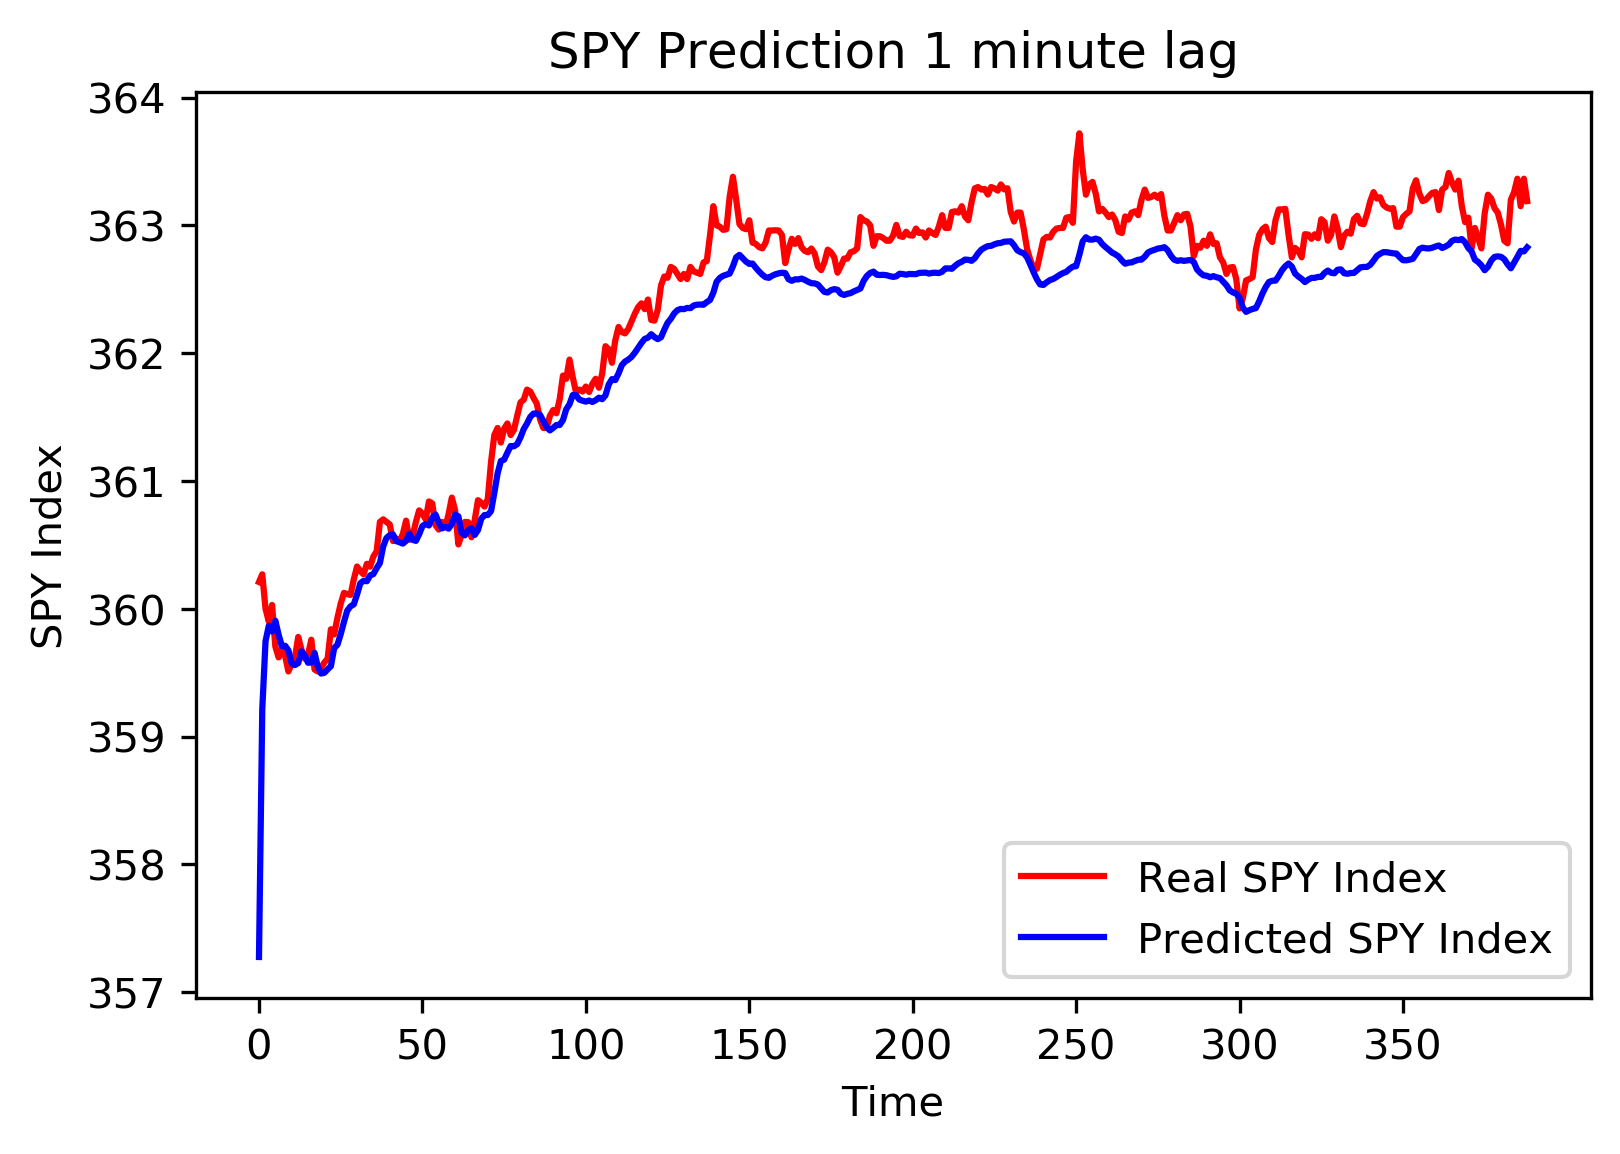

In [113]:
# Visualising the results
plt.plot(np.arange(0,389),dataset_test.values, color = 'red', label = 'Real SPY Index')
plt.plot(np.arange(0,389),predicted_stock_price, color = 'blue', label = 'Predicted SPY Index')
plt.xticks(np.arange(0,390,50))
plt.title('SPY Prediction 1 minute lag')
plt.xlabel('Time')
plt.ylabel('SPY Index')
plt.legend()
plt.show()

In [81]:
# before reset index
df.iloc[0].index

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [88]:
df.iloc[0,5:6]

Series([], Name: 2020-11-18 09:30:00-05:00, dtype: float64)

In [89]:
df.iloc[0]

Open      3.609100e+02
High      3.610100e+02
Low       3.607100e+02
Close     3.607600e+02
Volume    1.539385e+06
Name: 2020-11-18 09:30:00-05:00, dtype: float64

In [90]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [92]:
# after reset index
# Datetime is also Timestamp
df.iloc[0]

Datetime    2020-11-18 09:30:00-05:00
Open                           360.91
High                           361.01
Low                            360.71
Close                          360.76
Volume                        1539385
Name: 0, dtype: object

In [75]:
# The shape of x, y must be the same
# above use serial number
# need to find a standard for Timestamp for this project
print(dataset_test.values.shape)
print(predicted_stock_price.shape)
print(df[1560:].shape)
print(df.index[1560:].shape)

(389, 1)
(390, 1)
(389, 5)
(389,)
